In [118]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pl
import tensorflow as tf
from tensorflow import keras

In [119]:
data=pd.read_csv("titanic.csv")

In [120]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

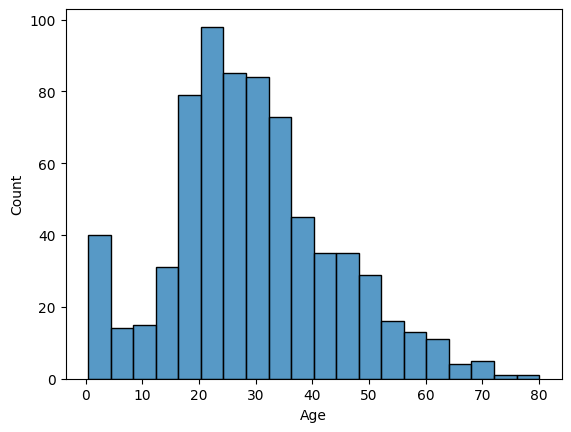

In [122]:
sn.histplot(data=data,x="Age")

In [123]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [124]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

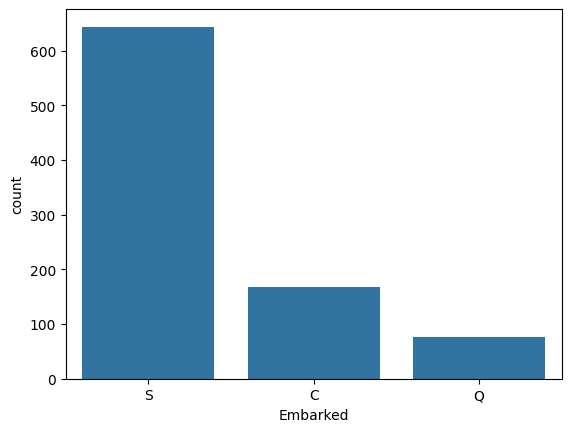

In [125]:
sn.countplot(data=data,x="Embarked")

In [126]:
data["Embarked"].fillna(method="ffill",inplace=True)

In [127]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [128]:
x=data.drop(["Name","Ticket","Cabin","PassengerId","Survived","Sex","Embarked"],axis=1)
y=data["Survived"]

In [129]:
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [130]:
x["Age"]=x["Age"].astype(int)

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [132]:
ss=StandardScaler()

In [133]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [135]:
model=keras.Sequential([
    keras.layers.Dense(5,input_shape=(5,),activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="RMSprop",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 4ms/step - loss: 0.7697 - accuracy: 0.4803
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7481 - accuracy: 0.4691
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7359 - accuracy: 0.4775
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.5183
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.5478
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5688
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5787
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.5913
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.6376
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.6124
Epoch 11/

In [136]:
model.evaluate(xtest,ytest)

6/6 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.6313


[0.6197633743286133, 0.6312848925590515]

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
ypred=model.predict(xtest)
ypred1=[]
for i in ypred:
    if i>0.5:
        ypred1.append(1)
    else:
        ypred1.append(0)

6/6 [==============================] - 0s 4ms/step


In [139]:
cn=confusion_matrix(ypred1,ytest)

Text(0.5, 1.0, 'Survival rate')

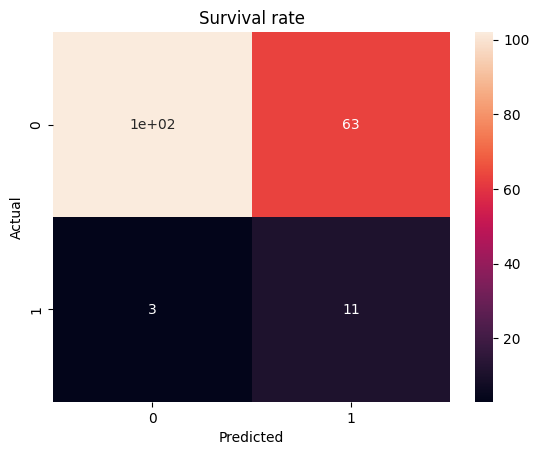

In [140]:
sn.heatmap(cn,annot=True)
pl.xlabel("Predicted")
pl.ylabel("Actual")
pl.title("Survival rate")